## Species Segmentation of Iris dataset using K-Means Clustering

The Iris flower dataset is one of the most popular ones for machine learning. You can read a lot about it online and have probably already heard of it: https://en.wikipedia.org/wiki/Iris_flower_data_set

There are 4 features: sepal length, sepal width, petal length, and petal width.

Start by creating 2 clusters. Then standardize the data and try again. Does it make a difference?

Use the Elbow rule to determine how many clusters are there.


## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'iris_dataset.csv'</i>.

In [2]:
data = pd.read_csv('iris_dataset.csv')
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Plot the data

For this exercise, we clustered the iris flowers by the shape of their sepal. 

<i> Use the 'sepal_length' and 'sepal_width' variables.</i> 

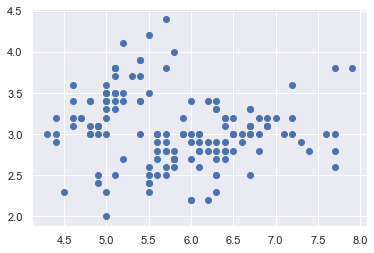

In [3]:
plt.scatter(data['sepal_length'],data['sepal_width'])
plt.show()

# Clustering (unscaled data)

Separate the original data into 2 clusters.

In [4]:
x = data.iloc[:,0:2]
x

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [5]:
cluster_unscaled = data.copy()
kmeans = KMeans(3)
kmeans.fit(x)
cluster_unscaled['cluster_pred'] = kmeans.fit_predict(x)
cluster_unscaled

,sepal_length,sepal_width,petal_length,petal_width,cluster_pred
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


<function matplotlib.pyplot.show(close=None, block=None)>

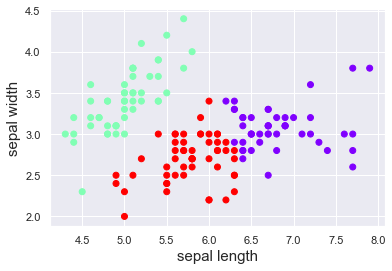

In [6]:
plt.scatter(cluster_unscaled['sepal_length'],cluster_unscaled['sepal_width'],c=cluster_unscaled['cluster_pred'],cmap = 'rainbow')
plt.xlabel('sepal length',size=15)
plt.ylabel('sepal width',size=15)
plt.show

# Standardize the variables

Import and use the <i> method </i> function from sklearn to standardize the data. 

In [7]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)

# Clustering (scaled data)

In [8]:
cluster_scaled = data.copy()
kmeans = KMeans(3)
kmeans.fit(x_scaled)
cluster_scaled['cluster_pred'] = kmeans.fit_predict(x_scaled)
cluster_scaled

,sepal_length,sepal_width,petal_length,petal_width,cluster_pred
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


<function matplotlib.pyplot.show(close=None, block=None)>

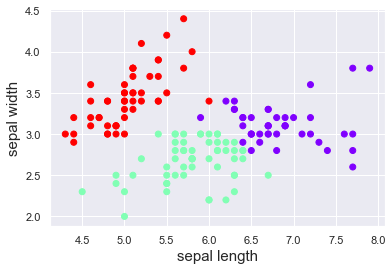

In [9]:
plt.scatter(cluster_scaled['sepal_length'],cluster_scaled['sepal_width'],c=cluster_scaled['cluster_pred'],cmap = 'rainbow')
plt.xlabel('sepal length',size=15)
plt.ylabel('sepal width',size=15)
plt.show

## Using Elbow Method To Find Appropriate Number of Clusters

### WCSS

In [10]:
wcss = []
for i in range (1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

[300.00000000000006,
 168.39262198361095,
 103.78443895265744,
 79.83879949066282,
 62.06939994188458,
 52.13668525175609,
 44.95642367159157,
 36.64135486902714,
 30.51603816033584]

### The Elbow Method

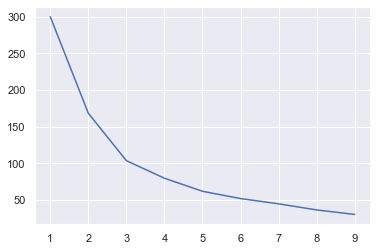

In [11]:
x = range (1,10)
plt.plot(x,wcss)
plt.show()

## Deciding number of clusters

In [12]:
cluster_scaled = data.copy()
kmeans = KMeans(4)
kmeans.fit(x_scaled)
cluster_scaled['cluster_pred'] = kmeans.fit_predict(x_scaled)
cluster_scaled

,sepal_length,sepal_width,petal_length,petal_width,cluster_pred
0,5.1,3.5,1.4,0.2,3
1,4.9,3.0,1.4,0.2,3
2,4.7,3.2,1.3,0.2,3
3,4.6,3.1,1.5,0.2,3
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<function matplotlib.pyplot.show(close=None, block=None)>

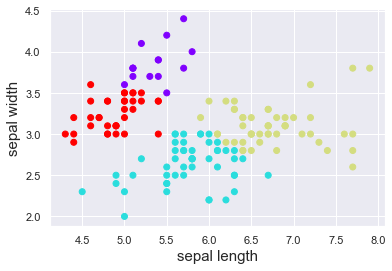

In [13]:
plt.scatter(cluster_scaled['sepal_length'],cluster_scaled['sepal_width'],c=cluster_scaled['cluster_pred'],cmap = 'rainbow')
plt.xlabel('sepal length',size=15)
plt.ylabel('sepal width',size=15)
plt.show

In [14]:
cluster_scaled = data.copy()
kmeans = KMeans(5)
kmeans.fit(x_scaled)
cluster_scaled['cluster_pred'] = kmeans.fit_predict(x_scaled)
cluster_scaled

,sepal_length,sepal_width,petal_length,petal_width,cluster_pred
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,4
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<function matplotlib.pyplot.show(close=None, block=None)>

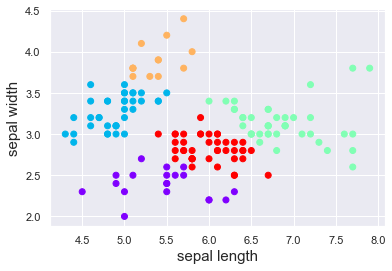

In [15]:
plt.scatter(cluster_scaled['sepal_length'],cluster_scaled['sepal_width'],c=cluster_scaled['cluster_pred'],cmap = 'rainbow')
plt.xlabel('sepal length',size=15)
plt.ylabel('sepal width',size=15)
plt.show

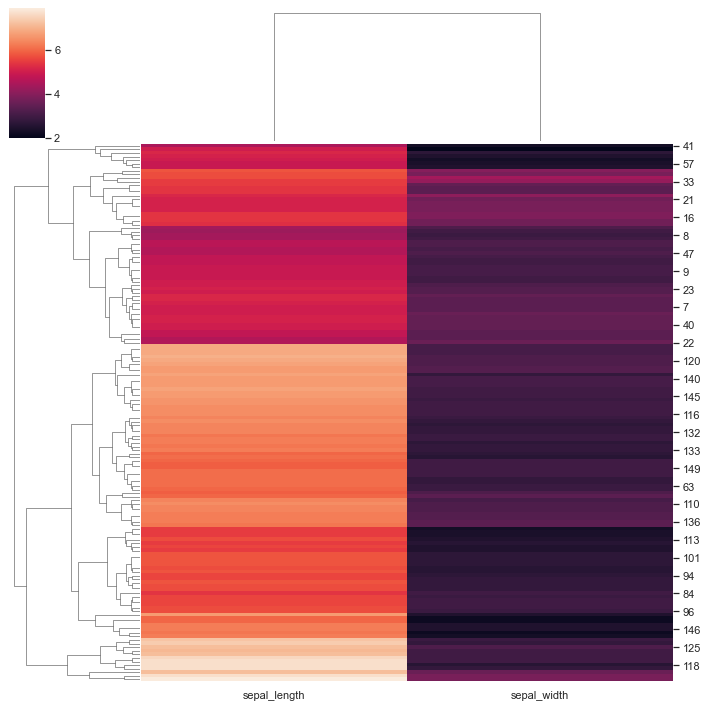

In [20]:
x = data1.iloc[:,0:2]
sns.clustermap(x)

## Conclusion (number of clusters)

#Since after increasing the number of clusters from 3 onwards, the model is only segmenting the pre-existing clusters into further clusters but not adding anymore value to it. Therefore 3 number of clusters are appropriate for this data.